# Building a Recurrent Neural Network (RNN)

Use RNN to do text classification on IMDB movie review dataset



## Library Imports

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

import matplotlib.pyplot as plt

## Load the dataset

In [12]:
# we will define a vocab_size limit and will load the data based on that vocab_size
vocab_size = 20000

In [13]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/suvosmac/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/suvosmac/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarra

In [14]:
# Padding all sequences, so that the reviews are of the same length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=200) # We will take reviews till 200 words
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=200)

## Building the Recurrent Neural Network

In [15]:
# Some constants for the RNN
LSTM_UNITS = 128
OUTPUT_UNITS = 1
LSTM_ACTIVATION = tf.keras.activations.tanh
OUTPUT_ACTIVATION = tf.keras.activations.sigmoid

OPTIMIZER = tf.keras.optimizers.RMSprop()
LOSS = tf.keras.losses.binary_crossentropy
METRICS = ['accuracy']

NUM_EPOCHS = 5
BATCH_SIZE = 128

In [16]:
model = tf.keras.Sequential()
# Embedding layer allows the rnn to get trained from a word vector representation
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=LSTM_UNITS, input_shape=(X_train.shape[1],)))
# Adding the LSTM layer
model.add(tf.keras.layers.LSTM(units=LSTM_UNITS, activation=LSTM_ACTIVATION))
# Adding the Dense Output layer
model.add(tf.keras.layers.Dense(units=OUTPUT_UNITS, activation=OUTPUT_ACTIVATION))

# Compiling the model
model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

# Check the summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [17]:
epochs_fit = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
196/196 [==============================] - 64s 318ms/step - loss: 0.5752 - accuracy: 0.7024
Epoch 2/5
196/196 [==============================] - 62s 317ms/step - loss: 0.3059 - accuracy: 0.8745
Epoch 3/5
196/196 [==============================] - 65s 334ms/step - loss: 0.2134 - accuracy: 0.9199
Epoch 4/5
196/196 [==============================] - 71s 363ms/step - loss: 0.1757 - accuracy: 0.9367
Epoch 5/5
196/196 [==============================] - 74s 379ms/step - loss: 0.1405 - accuracy: 0.9510


Text(0.5, 1.0, 'Training Accuracy Progress')

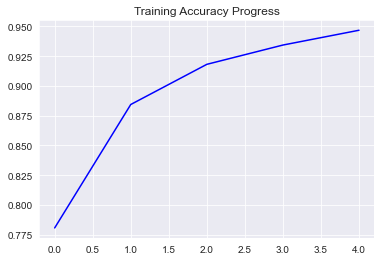

In [19]:
# Plot the training accuracy
epochs = range(len(epochs_fit.history['accuracy']))
plt.plot(epochs, epochs_fit.history['accuracy'], 'b', label='Training Accuracy')
plt.title("Training Accuracy Progress")

Text(0.5, 1.0, 'Training Loss Decline')

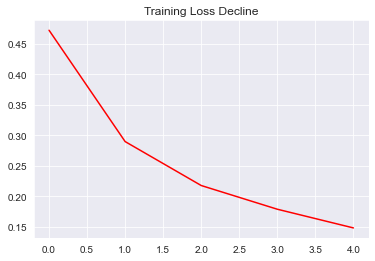

In [21]:
# Plot the training loss
epochs = range(len(epochs_fit.history['loss']))
plt.plot(epochs, epochs_fit.history['loss'], 'r', label='Training Loss')
plt.title('Training Loss Decline')

## Evaluating the Model

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy - {test_accuracy}")
print(f"Test Loss - {test_loss}")

782/782 [==============================] - 22s 28ms/step - loss: 0.5097 - accuracy: 0.8142
Test Accuracy - 0.8141599893569946
Test Loss - 0.5097132325172424


In [25]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(X_test)
print(classification_report(predictions, y_test))

/Users/suvosmac/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.96      0.74      0.84     16218
           1       0.67      0.95      0.78      8782

    accuracy                           0.81     25000
   macro avg       0.81      0.84      0.81     25000
weighted avg       0.86      0.81      0.82     25000



In [26]:
# Get the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions, y_test))

[[12036  4182]
 [  464  8318]]
